In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm 
import pandas as pd

%matplotlib inline

from pymc.Matplot import plot
import numpy as np
import daft
from IPython.core.pylabtools import figsize
figsize(12.5, 10)

import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np

In [2]:
import pydot

In [65]:
with pm.Model() as model:


#    diff_of_means = pm.Deterministic('difference of means', group1_mean - group2_mean)
 #   diff_of_stds = pm.Deterministic('difference of stds', group1_std - group2_std)
#effect_size = pm.Deterministic('effect size', diff_of_means / pm.sqrt((group1_std**2 + group2_std**2) / 2))


    alpha = pm.Normal("alpha", 0, 0.1)

    beta = pm.Normal("beta", 0, 0.1) # less uncertainty than before
#thickness_layer2 = pm.Normal("thickness_layer2", 100, 0.01)


    
    
        
    #gamma = pm.Deterministic("gamma", beta-thickness_layer2)


    step = pm.HamiltonianMC() # instantiate sampler
    trace = pm.sample(200, step, njobs=1) # draw 500 posterior samplers
#    step = pm.NUTS()
#    trace = pm.sample(50, step)

 [-----------------100%-----------------] 200 of 200 complete in 0.2 sec

In [20]:
trace["alpha"][50]

-0.3883991627015837

## Hamiltonian

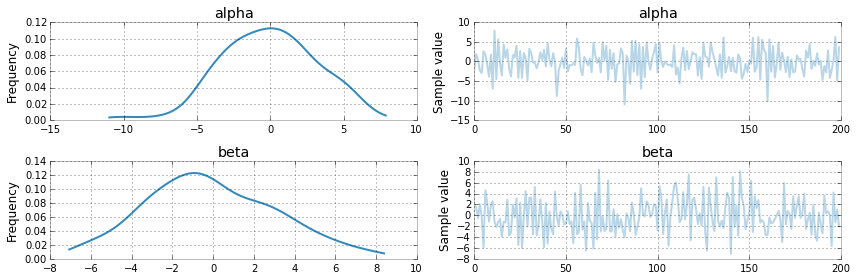

In [66]:
%matplotlib inline


pm.traceplot(trace);


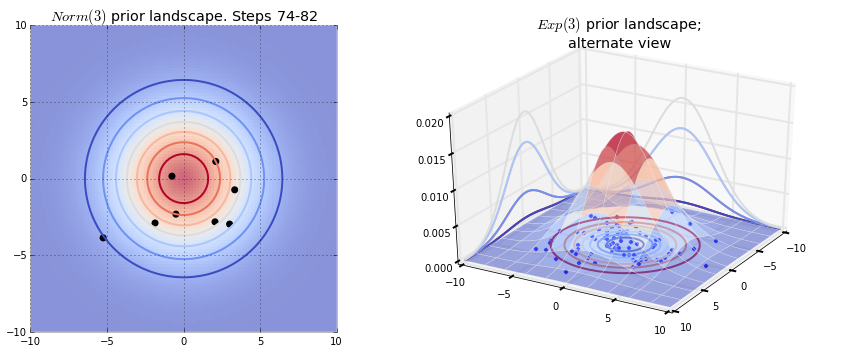

In [67]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
im = plt.imshow(M, interpolation='none', origin='lower', alpha=0.6,
                 cmap=cm.coolwarm, extent=(-10, 10, -10, 10))
plt.xlim(-10,10)
plt.ylim(-10,10)
for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")
    #plt.scatter(alpha.trace[51], beta.trace[51], c="k", s=50, edgecolor="none")
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax.view_init(azim=390)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 0.02])

for i in range(80):
    ax.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)

##NUTS

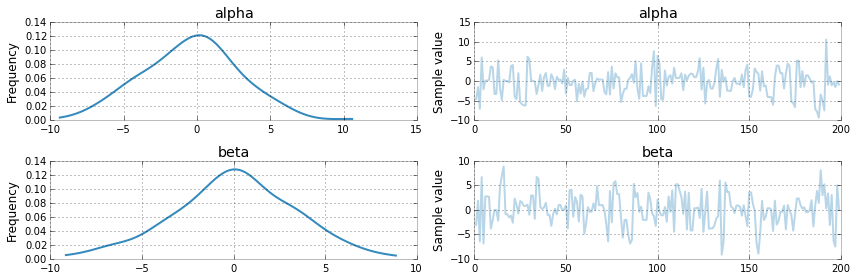

In [63]:
%matplotlib inline


pm.traceplot(trace);


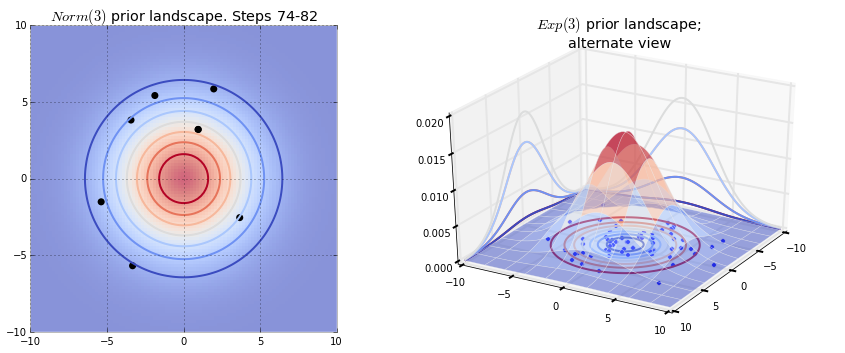

In [64]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
im = plt.imshow(M, interpolation='none', origin='lower', alpha=0.6,
                 cmap=cm.coolwarm, extent=(-10, 10, -10, 10))
plt.xlim(-10,10)
plt.ylim(-10,10)
for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")
    #plt.scatter(alpha.trace[51], beta.trace[51], c="k", s=50, edgecolor="none")
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax.view_init(azim=390)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 0.02])

for i in range(80):
    ax.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)


## Metropolis

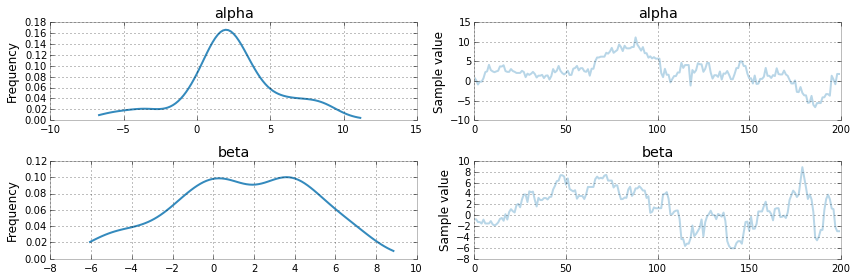

In [58]:
# This is wrong
%matplotlib inline


pm.traceplot(trace);


In [ ]:
pm.plots.summary(trace[1000:])

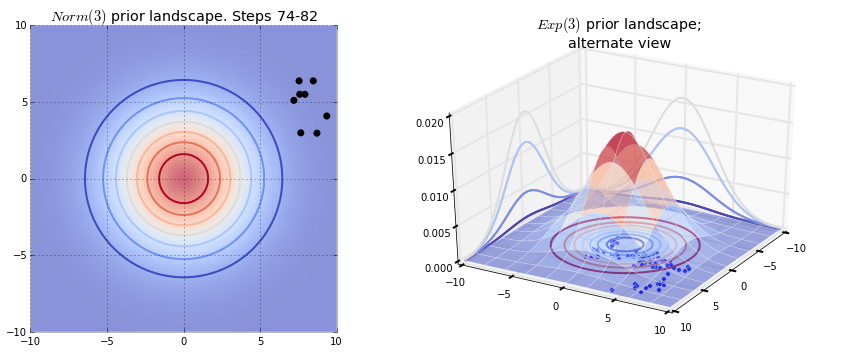

In [60]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

exp_x = stats.norm.pdf(x, scale=3.162278)

#print exp_x[:, None]

exp_y = stats.norm.pdf(x, scale=3.162278)


M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M,  cmap=cm.coolwarm,extent=(-10, 10, -10, 10))
im = plt.imshow(M, interpolation='none', origin='lower', alpha=0.6,
                 cmap=cm.coolwarm, extent=(-10, 10, -10, 10))
plt.xlim(-10,10)
plt.ylim(-10,10)
for i in range(74,82):
    plt.scatter(trace["alpha"][i], trace["beta"][i], c="k", s=50, edgecolor="none")
    #plt.scatter(alpha.trace[51], beta.trace[51], c="k", s=50, edgecolor="none")
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Norm(3)$ prior landscape. Steps 74-82")

#plt.subplot(222)
#plt.plot(exp_x)
plt.tight_layout()

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M,  cmap=cm.coolwarm, alpha=0.5)
ax.view_init(azim=390)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 0.02])

for i in range(80):
    ax.scatter(trace["alpha"][i], trace["beta"][i])
plt.title("$Exp(3)$ prior landscape; \nalternate view")


cset = ax.contour(X, Y, M, zdir='z', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='x', offset=-10, cmap=cm.coolwarm_r)
cset = ax.contour(X, Y, M, zdir='y', offset=-10, cmap=cm.coolwarm_r)